In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tempos = pd.read_csv('/content/BINIT.txt', sep=",", header=None)
tempos.rename(columns={0: "TAM_VETOR", 1: "BINIT"}, inplace = True)
tempos['BINREC'] = pd.read_csv('/content/BINREC.txt', sep=",", header=None)
tempos['LINEAR'] = pd.read_csv('/content/LINIT.txt', sep=",", header=None)
tempos.head()

,TAM_VETOR,BINIT,BINREC,LINEAR
0,10000,0.000172,0.000203,0.022505
1,30000,0.000166,0.000203,0.064877
2,50000,0.000180,0.000227,0.109766
3,70000,0.000197,0.000238,0.149982
4,90000,0.000194,0.000237,0.188496


In [88]:
B = tempos["BINIT"].quantile(0.95)
L = tempos["BINIT"].quantile(0.05)
tempos = tempos[tempos["BINIT"] <= B]
tempos = tempos[tempos["BINIT"] >= L]

B = tempos["BINREC"].quantile(0.95)
L = tempos["BINREC"].quantile(0.05)
tempos = tempos[tempos["BINREC"] <= B]
tempos = tempos[tempos["BINREC"] >= L]


In [89]:
passo = 10
lista = []
for i in range (passo, tempos.shape[0], passo):
  lista.append(tempos[:][(i-passo):i].mean())
medias =pd.DataFrame(lista,columns=['TAM_VETOR','BINIT', 'BINREC','LINEAR'])
medias.shape

(405, 4)

In [90]:
medias.head()

,TAM_VETOR,BINIT,BINREC,LINEAR
0,150000.0,0.000194,0.000237,0.320114
1,400000.0,0.000196,0.000243,0.831058
2,630000.0,0.000196,0.000248,1.322808
3,856000.0,0.000191,0.000244,1.795980
4,1076000.0,0.000188,0.000245,2.211860


[Text(0, 0.5, 'Tempo de execução(ms)'), Text(0.5, 0, 'Tamanho do vetor')]

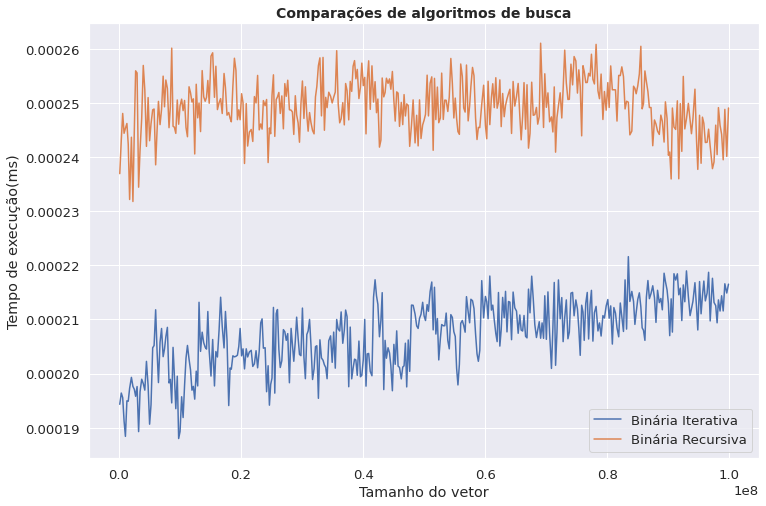

In [91]:

sns.set(font_scale=1.2)  
plt.figure(figsize=(12, 8))
ax =sns.lineplot(data=medias, x="TAM_VETOR", y="BINIT")
ax =sns.lineplot(data=medias, x="TAM_VETOR", y="BINREC")
ax.legend(['Binária Iterativa', 'Binária Recursiva'])
ax.set_title('Comparações de algoritmos de busca', fontdict={'fontsize' : 14}, weight='bold')
ax.set(xlabel='Tamanho do vetor', ylabel='Tempo de execução(ms)')

[Text(0, 0.5, 'Tempo de execução(ms)'), Text(0.5, 0, 'Tamanho do vetor')]

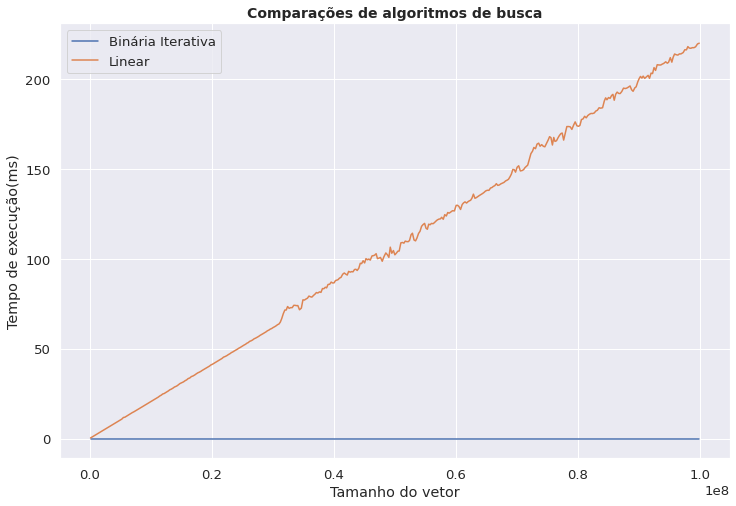

In [92]:
sns.set(font_scale=1.2)  
plt.figure(figsize=(12, 8))
ax =sns.lineplot(data=medias, x="TAM_VETOR", y="BINIT")
ax =sns.lineplot(data=medias, x="TAM_VETOR", y="LINEAR")
ax.set_title('Comparações de algoritmos de busca', fontdict={'fontsize' : 14}, weight='bold')
ax.legend(['Binária Iterativa', 'Linear'])
ax.set(xlabel='Tamanho do vetor', ylabel='Tempo de execução(ms)')

In [93]:
original.corr(method ='pearson')[:1]

,TAM_VETOR,BINIT,BINREC,LINEAR
TAM_VETOR,1.0,0.038428,-0.012521,0.999116
